In [8]:
import numpy as np
import skfuzzy as fuzz
import gymnasium as gym
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import numpy as np
import math

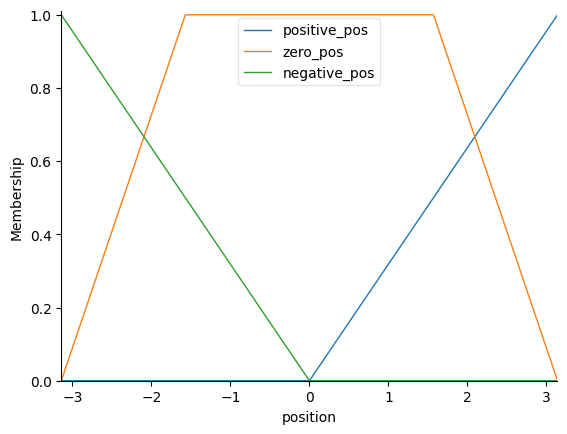

In [9]:
position = ctrl.Antecedent(np.arange(-np.pi, np.pi, 0.01), 'position')

position['positive_pos'] = fuzz.trimf(position.universe, [0, np.pi, np.pi])
position['zero_pos'] = fuzz.trapmf(position.universe, [-np.pi, -np.pi / 2, np.pi / 2, np.pi])
position['negative_pos'] = fuzz.trimf(position.universe, [-np.pi, -np.pi, 0])

position.view()

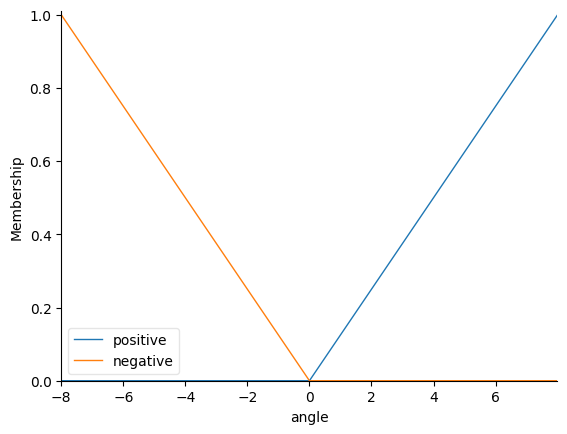

In [10]:
angle = ctrl.Antecedent(np.arange(-8, 8, 0.01), 'angle')

angle['positive'] = fuzz.trimf(angle.universe, [0, 8, 8])
angle['negative'] = fuzz.trimf(angle.universe, [-8, -8, 0])

angle.view()

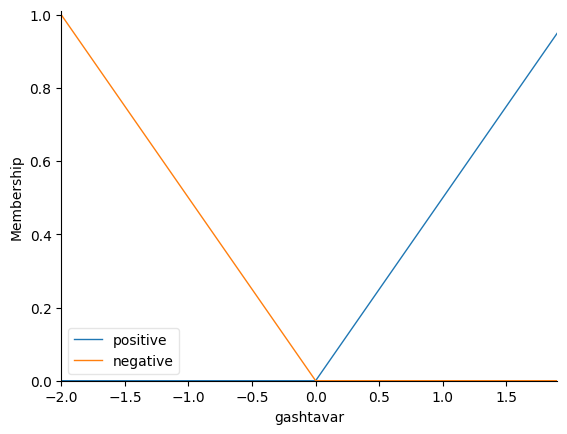

In [11]:
gashtavar = ctrl.Consequent(np.arange(-2, 2, 0.1), 'gashtavar')

gashtavar['positive'] = fuzz.trimf(gashtavar.universe, [0, 2, 2])
gashtavar['negative'] = fuzz.trimf(gashtavar.universe, [-2, -2, 0])

gashtavar.view()

In [12]:
rule1 = ctrl.Rule(position['positive_pos'] & angle['positive'], gashtavar['positive'])
rule2 = ctrl.Rule(position['positive_pos'] & angle['negative'], gashtavar['negative'])
rule3 = ctrl.Rule(position['zero_pos'] & angle['positive'], gashtavar['negative'])
rule4 = ctrl.Rule(position['zero_pos'] & angle['negative'], gashtavar['positive'])
rule5 = ctrl.Rule(position['negative_pos'] & angle['positive'], gashtavar['positive'])
rule6 = ctrl.Rule(position['negative_pos'] & angle['negative'], gashtavar['negative'])

In [13]:
controller = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
simulator = ctrl.ControlSystemSimulation(controller)

You Win in 274 iteration!


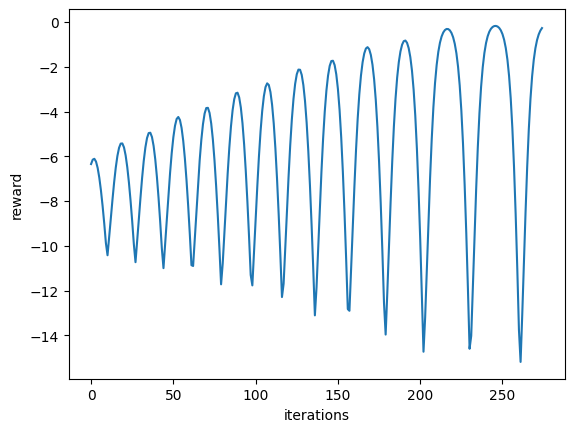

In [14]:
env = gym.make("Pendulum-v1", render_mode="human", g=9.81)

def calculate_degree(x, y):
    radian_degree = math.atan2(x, y)
    
    result = 0
    if -np.pi / 2 <= radian_degree:
        result = radian_degree - np.pi / 2
    if -np.pi <= radian_degree <= -np.pi / 2:
        result = radian_degree + 3 * np.pi / 2
    return result

observation, _ = env.reset()
rewards = []
for _ in range(500):

    obs0 = observation[0]
    obs1 = observation[1]

    simulator.input['position'] = calculate_degree(obs0, obs1)
    simulator.input['angle'] = observation[2]
    simulator.compute()
    decision = simulator.output['gashtavar']

    observation, reward, terminated, truncated, info = env.step([decision])
    rewards.append(reward)

    # Make it easier
    if observation[0] >= 0.99 and math.fabs(observation[2]) <= 1.5:
        terminated=True
    
    env.render()
    
    if terminated:
        print(f'You Win in {_} iteration!')
        break

env.close()

plt.plot(rewards)
plt.xlabel('iterations')
plt.ylabel('reward')
plt.show()